## Challenge Exercise 3 (CE3)

### See Canvas for assignment dates

****

## Collaboration policy

This is a **group assignment**. Each group may have up to **two** students, and there are no pre-assigned groups. **All group members must be different from those in CE1 and CE2**—there may be **no overlap** with any previous group.

Please be **welcoming and considerate** when forming groups. You are encouraged to reach out to classmates you may not know well and to act as a supportive, inclusive member of the class. If you are unsure about what is or is not allowed, **you must ask for clarification in advance**. Claiming confusion or uncertainty after the fact will not be accepted as an excuse.

**Collaboration is permitted only within your team.** There may be **no collaboration, discussion, or sharing of work between different teams**. All submitted work must be **entirely the product of your own team**.

To ensure fairness for everyone, the **collaboration policy will be strictly enforced**. Any violation may result in **a zero for all students involved**.

In the Markdown cell below, list the full names of all members of your group.


### Team members

1. Nabiha Choudhury 
2. Dmitrii Pavolov


****
## AI policy

AI may not be used to generate a coding solution. Your solution must be your own work. If you have any questions about what is or isn't allowed, you must ask. Saying afterwards that you didn't understand or were unsure is not an acceptable excuse.

To ensure fairness for everyone, the **AI policy will be strictly enforced**. Any violation may result in **a zero for all students involved**.


****
## Honor pledge

To acknowledge and understand the **Collaboration and AI policies** outlined above, each team member must enter their Onyen and PID in this markdown cell.

1. chnabi PID: 730659209
2. Onyen and PID
3. Onyen and PID

****

## Python modules

All the Python modules needed to complete this CE are provided to you. 

<span style="background-color: #FFFF00">**No other modules are authorized** and **if other modules are added points will be deducted**.</span>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

****

## Numerical Interpolation
This question focuses on using linear and cubic interpolation to estimate values from an undersampled cosine curve.

In the coding cell below: 
* The cosine curve is defined by function $f(x)$.
* The points in $P$ form an $N \times 2$ matrix that represents $N=7$ observations along the curve.
* The observed $x$-values are in the first column of $P$.
* The observed $y$-values are in the second column of $P$.
* The observed $x$-values are equally spaced in $[0,12]$.


In [3]:
# function that defines the cosine curve
def f(x):
    return np.cos(0.8*x)+x/8+4
    
# Observed points (X and Y)
x_obs = np.linspace(0, 12, 7)
y_obs = f(x_obs)
print(y_obs)
# P matrix
P = np.stack((x_obs, y_obs),axis=-1)

[5.         4.22080048 3.50170522 4.83749898 5.99318492 5.10449997
 4.51531214]


****

<img src="p1.png" width="450" style="float: right"/>

**P1** (10 points). In the coding cell below, write a small program that performs piecewise linear interpolation. Specifically, for each pair of adjacent points in $P$ that form a straight line, numerically estimate **four** evenly spaced points (`blue`) on the line between the endpoints (`red`). 

To receive full credit, your solution must generate a plot identical to the one provided.

<ins>Notes:</ins>

* The plot figure size is $7$ inches in width and $4$ inches in height.
* The observed points are colored `red`.
* The interpolated points are colored `blue`.
* The cosine curve is defined by $500$ equally spaced points in $[0,12]$.
* The cosine curve is colored `black`.

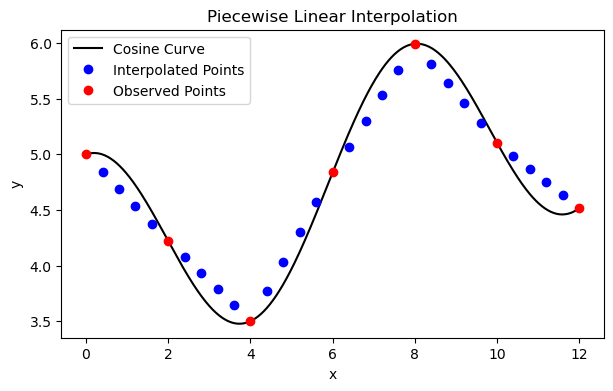

In [44]:
# --------------------------------------
# Add your P1 coding solution below.
# --------------------------------------
delta = 2 
interpolated = [] 
num_observations = len(x_obs) 

def linear_interpolation(num_pts): 
    interpolation_pts = [] 
    interpolated_values = []
    for i in range(num_observations - 1): 
        x_1 = x_obs[i]
        x_2 = x_obs[i + 1]
        y_1 = y_obs[i] 
        y_2 = y_obs[i + 1]
        slope = (y_2 - y_1) / (x_2 - x_1)
        for x in np.linspace(x_1, x_2, num_pts + 2)[1:-1]: 
            interpolation_pts.append(x)
            y = slope * (x - x_1) + y_1 
            interpolated_values.append(y)
    return interpolation_pts, interpolated_values

interpolation_pts, interpolated_values = linear_interpolation(4)

pts = np.linspace(0,12,500) 
plt.figure(figsize=(7,4))
plt.title("Piecewise Linear Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(pts, f(pts), color="black", label="Cosine Curve")
plt.plot(interpolation_pts, interpolated_values, "bo", label="Interpolated Points")
plt.plot(x_obs, y_obs, "ro", label="Observed Points")
plt.legend()




****

**P2** (5 points). In the coding cell below, write a small program that estimates the **Mean Absolute Error (MAE)** and prints the result using **three decimal places**.

Specifically, for each pair of adjacent points in $P$, use your solution from **P1** to generate $n$ evenly spaced points, then compute the error

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \left| \hat{y}_i - f(x_i) \right|,
$$

where $\hat{y}_i$ is the estimated value and $f(x_i)$ is the corresponding value on the cosine curve.

Compute the MAE for $n = 4$, $8$, and $16$. Your results should match the provided benchmarks within $\pm 0.050$ to receive full credit.

```
(n=4) MAE=0.172
(n=8) MAE=0.159
(n=16) MAE=0.151
```

In [45]:
# --------------------------------------
# Add your P2 coding solution below.
# --------------------------------------

iteration_nums = [4, 8, 16] 
MAEs = [] 

for n in iteration_nums:
    sum = 0
    interpolation_pts, interpolated_values = linear_interpolation(n) 
    for i in range(len(interpolation_pts)):
        sum = sum + np.abs(interpolated_values[i] - f(interpolation_pts[i]))
    MAEs.append(sum / len(interpolation_pts))  

for n, mae in zip(iteration_nums, MAEs):
    print(f"(n={n}) MAE={mae:.3f}")
    










(n=4) MAE=0.172
(n=8) MAE=0.159
(n=16) MAE=0.151


****

<img src="p3.png" width="450" style="float: right"/>

**P3** (10 points). In the coding cell below, write a small program that performs cubic spline interpolation. Specifically, for each pair of adjacent points in $P$ that form a smooth curve, numerically estimate **four** evenly spaced points (`blue`) between the endpoints (`red`). 

To receive full credit, your solution must generate a plot identical to the one provided.

<ins>Notes:</ins>

* The plot figure size is $7$ inches in width and $4$ inches in height.
* The observed points are colored `red`.
* The cubic interpolated points are colored `blue`.
* The cosine curve is defined by $500$ equally spaced points in $[0,12]$.
* The cosine curve is colored `black`.

In [ ]:
# --------------------------------------
# Add your P3 coding solution below.
# --------------------------------------













****

**P4** (5 points). In the coding cell below, write a small program that estimates the **Mean Absolute Error (MAE)** and prints the result using **three decimal places**.

Specifically, for each pair of adjacent points in $P$, use your solution from **P3** to generate $n$ evenly spaced points, then compute the error

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \left| \hat{y}_i - f(x_i) \right|,
$$

where $\hat{y}_i$ is the estimated value and $f(x_i)$ is the corresponding value on the cosine curve.

Compute the MAE for $n = 4$, $8$, and $16$. Your results should match the provided benchmarks within $\pm 0.050$ to receive full credit.
```
(n=4) MAE=0.059
(n=8) MAE=0.055
(n=16) MAE=0.053
```

In [ ]:
# --------------------------------------
# Add your P4 coding solution below.
# --------------------------------------










